In [20]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from numpy.random import multivariate_normal

# Set seed for reproducibility
np.random.seed(42)


In [21]:
# Expected annual returns (%)
mean_returns = np.array([0.02, 0.07, 0.15, 0.20])

# Annual standard deviations (volatility)
std_devs = np.array([0.05, 0.12, 0.17, 0.25])

# Correlation matrix
correlation_matrix = np.array([
    [1.0, 0.3, 0.3, 0.3],
    [0.3, 1.0, 0.6, 0.6],
    [0.3, 0.6, 1.0, 0.6],
    [0.3, 0.6, 0.6, 1.0]
])

In [22]:
# Covariance Matrix and Simulated Returns
D = np.diag(std_devs)
cov_matrix = D @ correlation_matrix @ D  # Covariance matrix

n_days = 700
np.random.seed(42)
returns = multivariate_normal(mean_returns, cov_matrix, size=n_days)



In [23]:
def simulate_portfolios(n_simulations=10000, allow_shorts=True):
    results = []
    for _ in range(n_simulations):
        if allow_shorts:
            weights = np.random.uniform(-1, 1, size=4)
        else:
            weights = np.random.uniform(0, 1, size=4)
        weights /= np.sum(weights)

        # Portfolio daily returns
        port_daily_returns = returns @ weights

        # Annualized return & risk
        port_return = np.mean(port_daily_returns) * 252
        port_risk = np.std(port_daily_returns) * np.sqrt(252)

        results.append({
            'Return': port_return,
            'Risk': port_risk,
            'Weights': weights,
            'Shorts': allow_shorts
        })
    return pd.DataFrame(results)


In [24]:
# Simulation Runs
# With and without shorting
df_with_shorts = simulate_portfolios(5000, allow_shorts=True)
df_no_shorts = simulate_portfolios(5000, allow_shorts=False)

# Combine results
df = pd.concat([df_with_shorts, df_no_shorts], ignore_index=True)


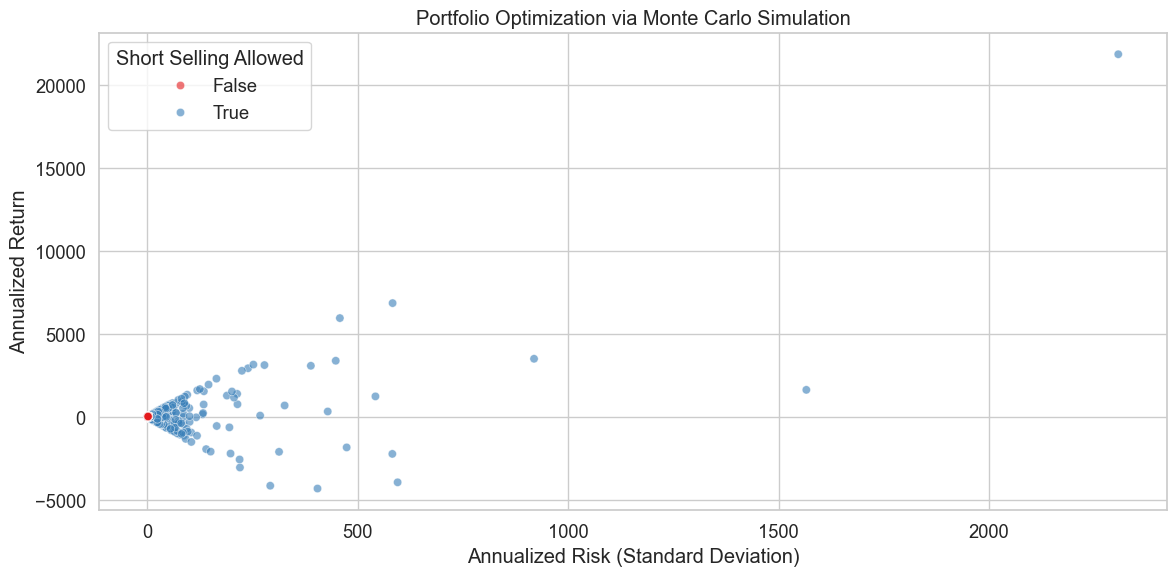

In [25]:
# Visualization
# Setup plot style
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df, x='Risk', y='Return', hue='Shorts',
    palette='Set1', alpha=0.6
)
plt.title('Portfolio Optimization via Monte Carlo Simulation')
plt.xlabel('Annualized Risk (Standard Deviation)')
plt.ylabel('Annualized Return')
plt.legend(title='Short Selling Allowed')
plt.tight_layout()
plt.savefig("portfolio_optimization_monte_carlo.png", dpi=300)
plt.show()


In [26]:
best_no_shorts = df[df['Shorts'] == False].sort_values(by='Return', ascending=False).iloc[0]
best_with_shorts = df[df['Shorts'] == True].sort_values(by='Return', ascending=False).iloc[0]

print("=== Best Portfolio (No Short Selling) ===")
for i, w in enumerate(best_no_shorts['Weights']):
    print(f"Asset {i+1}: {w:.4f}")
print(f"Return: {best_no_shorts['Return']:.2f}")
print(f"Risk:   {best_no_shorts['Risk']:.2f}\n")

print("=== Best Portfolio (With Short Selling) ===")
for i, w in enumerate(best_with_shorts['Weights']):
    print(f"Asset {i+1}: {w:.4f}")
print(f"Return: {best_with_shorts['Return']:.2f}")
print(f"Risk:   {best_with_shorts['Risk']:.2f}")

=== Best Portfolio (No Short Selling) ===
Asset 1: 0.0297
Asset 2: 0.0198
Asset 3: 0.0334
Asset 4: 0.9172
Return: 47.76
Risk:   3.50

=== Best Portfolio (With Short Selling) ===
Asset 1: 288.5668
Asset 2: -1331.5628
Asset 3: 703.2817
Asset 4: 340.7142
Return: 21843.48
Risk:   2307.17


In [27]:
df.to_csv("monte_carlo_portfolios.csv", index=False)
print("\nAll portfolio results saved to 'monte_carlo_portfolios.csv'")
print("Scatter plot saved to 'portfolio_optimization_monte_carlo.png'")



All portfolio results saved to 'monte_carlo_portfolios.csv'
Scatter plot saved to 'portfolio_optimization_monte_carlo.png'


In [28]:
df.groupby('Shorts')[['Return', 'Risk']].mean()

,Return,Risk
Shorts,,
False,26.713249,1.841073
True,34.863503,9.186417
